#1 (a)

[2 1 1 2 0 2 1 2 0 2 0 1 1 0 0 1 2 1 0 1 2 0 1 0 2 2 0 2 2 1 1 0 1 1 1 0 0
 0 2 2 0 1 1 2 0 0 2 1 1 1 1 2 1 2 2 2 2 2 1 1 2 2 2 2 0 0 1 1 1 0 0 2 2 2
 2 2 2 0 2 1]
Mean:  0.56875
Variance:  0.64359375


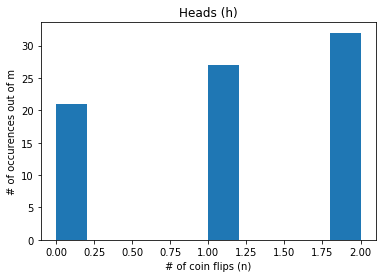

In [439]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

n = 2
p = 0.5
m = 80
results = np.random.binomial(n,p,size=m)

#(i)
mean = np.mean(results)/n
variance = np.var(results)
print(results)
print("Mean: ", mean)
print("Variance: ", variance)

#(ii)
plt.hist(results, range=(0,n))
plt.ylabel("# of occurences out of m")
plt.xlabel("# of coin flips (n)")
plt.title("Heads (h)")
#The histogram looks approximately like a discrete version of the normal distribution

#(iii)
theory_mean = n*p
theory_var = n*p*(1-p)
abs_diff_mean = np.maximum(mean-theory_mean, theory_mean-mean)
abs_diff_var = np.maximum(variance-theory_var, theory_var-variance)

#1 (b)

In [441]:
#(i)
prob_A = np.count_nonzero(results==2)/m
print(prob_A)
prob_B = np.count_nonzero(results>=1)/m
print(prob_B)
prob_A_given_B = prob_A/prob_B #Because P(A and B) is equal to P(A) in this case
print(prob_A_given_B)

#(ii)
theory_pA = 1/4
theory_pB = 3/4
theory_pA_given_B = 1/3
abs_diff_pA = np.maximum(theory_pA-prob_A, prob_A-theory_pA)
abs_diff_pB = np.maximum(theory_pB-prob_B, prob_B-theory_pB)
abs_diff_pA_given_B = np.maximum(theory_pA_given_B-prob_A_given_B, prob_A_given_B-theory_pA_given_B)

0.4
0.7375
0.5423728813559322


(iii)  
L(P) = $\prod_{i=1}^{M} p^{x_{i}}(1-p)^{n-x_{i}}$  
L(P) = $p^{Mx}(1-p)^{M(n-x)}$  
ln(L(P)) = $Mxln(p)+M(n-x)ln(1-p)$  
$0=Mx/(\hat{p})-M(n-x)/(1-\hat{p})$  
$Mx/(\hat{p})=M(n-x)/(1-\hat{p})$  
$(Mn-MX)(\hat{p})=MX(1-\hat{p})$  
$Mn\hat{p}-MX\hat{p})=MX-MX\hat{p}$  
$Mn\hat{p}=MX$  
$\hat{p}=MX/Mn$  
$\hat{p}=X/n$

#1 (c)  
(i) Yes events C and D are independent because P(C)*P(D)=P(C and D)  
P(C) = 1/2  
P(D) = 1/2  
P(C and D) = 1/4 = P(C)*P(D)

In [ ]:
#(ii)
#prob_C = results.count(0)
#prob_D = results.count()
#prob_CD = results.count()

#(iii)


#1 (d)  
(i)  
P(HF) = P(H|F)*P(F) = (1/2)*(1/40) = 1/80  
P(HF') = P(H)-P(HF) = (1/10)-(1/80) = 7/80  
P(H'F) = P(F)-P(HF) = (1/40)-(1/80) = 1/80  
P(H'F') = P(HuF)' = 1-P(H)-P(F)+P(HF) = 1-(1/10)-(1/40)+(1/80) = 71/80

In [537]:
#(ii)
size = 80
ls=[]
for x in range(0,size):
    rand=random.randint(1,size+1)
    if rand <= (1/80)*size:
        ls.append('HF')
    elif rand <= (1/10)*size:
        ls.append('F')
    elif rand <= (1/8)*size:
        ls.append('H')
    elif rand <= size:
        ls.append('C')
print(ls)

#(iii)
prob_H = ls.count('H')/size
print(prob_H)
prob_F = ls.count('F')/size
print(prob_F)
prob_HgivenF = (ls.count('HF')/prob_F)/size
print(prob_HgivenF)

['C', 'C', 'F', 'C', 'F', 'C', 'C', 'C', 'F', 'C', 'H', 'C', 'C', 'C', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'C', 'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'C', 'H', 'C', 'F', 'C', 'C', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'HF', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'C', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
0.0375
0.125
0.1


==============================================================================================================
#2

Text(0,0.5,'z')

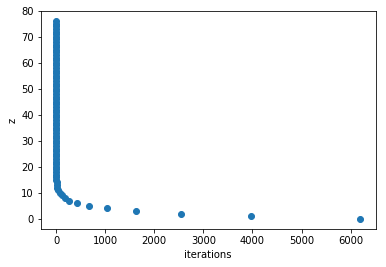

In [384]:
#Calculating gradient of any 2-variable function
from sympy import *
x = Symbol('x')
y = Symbol('y')

function = (x-1)**2 + (y-2)**2
dfx = function.diff(x) #Partial derivative w.r.t 'x' 
dfy = function.diff(y) #Partial derivative w.r.t 'y'
gradient = [dfx, dfy] #Gradient 'vector'

#Calculating gradient descent iterations
iterations = []
curr_x = random.randint(-100,100)
curr_y = random.randint(-100,100)
alpha = .1
counter = 0
prev_step = 1
max_count = 1000
epsilon = 0.000001

while prev_step > epsilon and counter < max_count:
    old_x = curr_x
    old_y = curr_y
    curr_x = curr_x - alpha*dfx.subs(x, old_x).subs(y, old_y) #Perform gradiant descent
    curr_y = curr_y - alpha*dfy.subs(x, old_x).subs(y, old_y) #Perform gradiant descent
    prev_step = np.maximum(abs(curr_x - old_x), abs(curr_y - old_y)) #Calculate delta x
    iterations.append(function.subs(x,curr_x).subs(y,curr_y))
    counter += 1 

#Plotting trajectory on iterations
plt.scatter(iterations,list(range(len(iterations))));
plt.xlabel('iterations')
plt.ylabel('z')

As I changed the values of alpha the speed to convergence changed drastically. As the values of alpha increased as did the speed to convergence. At values of alpha=0.1 I was able to reach convergence after only 70 iterations, but with alpha=0.0001 it could take all the way up 12000 iterations.  

 ================================================================================================================= 
 #3

# <a href="https://ibb.co/LDFL2rq"><img src="https://i.ibb.co/Q7g21kq/Question-3.jpg" alt="Question-3" border="0"></a>